In [63]:
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as backend

from sklearn.preprocessing import minmax_scale

import matplotlib.pyplot as plt

In [64]:
# Define some functions that will help with error measurements
def getIndexOfPrediction(prediction):
  maxIndex = 0
  maxValue = -99999
  for i in range(len(prediction)):
    pred = prediction[i]
    if pred > maxValue:
      maxValue = pred
      maxIndex = i
  return maxIndex

def getPredictedClasses(predictions):
  classes = []
  for i in range(len(predictions)):
    classes.append(getIndexOfPrediction(predictions[i]))
  return classes

def countInnacuracies(y_classes, predicted_classes):
  innacuracies = 0
  for i in range(len(y_classes)):
    y = y_classes[i]
    pc = predicted_classes[i]
    if y != pc:
      innacuracies = innacuracies + 1
  return innacuracies

def convertClassesToArray(classes):
  classArray = []
  for i in range(len(classes)):
    classArray.append(classes[i][0])
  return classArray


In [65]:
# Define the data
stimulusResponsePairCount = 50
classes = 256

In [66]:
# Generate random data and one-hot encode it

x = []
t = 0
for i in range(stimulusResponsePairCount):
  z = []
  for j in range(1):
    z.append(t)
  x.append(z)
  t = t + 1
x = np.asarray(x)

y = np.random.randint(classes, size=(stimulusResponsePairCount,1))


In [67]:
x = minmax_scale(x, feature_range=(-1,1))

In [68]:
# Define the model

model = keras.Sequential()
model.add(layers.Dense(32, activation='relu', input_dim=1))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               8448      
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Fit the model

history = model.fit(x, y, epochs=2500, batch_size=10000)

===========] - 0s 2ms/step - loss: 0.5702 - sparse_categorical_accuracy: 1.0000
Epoch 2335/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5704 - sparse_categorical_accuracy: 1.0000
Epoch 2336/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5698 - sparse_categorical_accuracy: 1.0000
Epoch 2337/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5692 - sparse_categorical_accuracy: 1.0000
Epoch 2338/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5688 - sparse_categorical_accuracy: 1.0000
Epoch 2339/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5688 - sparse_categorical_accuracy: 1.0000
Epoch 2340/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5689 - sparse_categorical_accuracy: 1.0000
Epoch 2341/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5683 - sparse_categorical_accuracy: 1.0000
Epoch 2342/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.568

Classes
[147, 98, 152, 115, 192, 39, 82, 155, 234, 209, 118, 148, 203, 254, 109, 28, 22, 180, 162, 180, 46, 67, 0, 112, 81, 66, 136, 236, 77, 105, 125, 119, 180, 250, 56, 62, 139, 252, 192, 141, 43, 151, 50, 49, 211, 119, 117, 78, 156, 148]
Predicted Classes
[147, 98, 152, 115, 192, 39, 82, 155, 234, 209, 118, 148, 203, 254, 109, 28, 22, 180, 162, 180, 46, 67, 0, 112, 81, 66, 136, 236, 77, 105, 125, 119, 180, 250, 56, 62, 139, 252, 192, 141, 43, 151, 50, 49, 211, 119, 117, 78, 156, 148]
Innacuracies = 0 out of 50


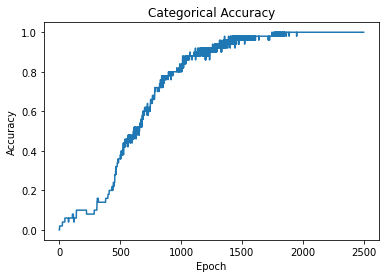

In [70]:
# Output the results

# Make the predictions
predictions = model.predict(x)

# Errors
convertedClasses = convertClassesToArray(y)
predictedClasses = getPredictedClasses(predictions)
innaccuracies = countInnacuracies(convertedClasses, predictedClasses)


print('Classes')
print(convertedClasses)
print('Predicted Classes')
print(predictedClasses)

# Summary
print('Innacuracies = ' + str(innaccuracies) + ' out of ' + str(len(convertedClasses)))
plt.plot(history.history['sparse_categorical_accuracy'])
plt.title('Categorical Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
